In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import json
import numpy as np

In [4]:
path = "C:/Users/KarstenK/Desktop/results/half-vehicles/"
model_names = ["baseline", "rl-new-obs-150k"]

In [5]:
vehicle_travel_time_all = {m: [] for m in model_names}
vehicle_travel_time_tls_controlled = {m: [] for m in model_names}
lane_waiting_time = {m: [] for m in model_names}



for model_name in model_names:
    directory = path + model_name
    for filename in os.listdir(directory):
        if filename.startswith("eval_results"):
            filepath = os.path.join(directory, filename)
            with open(filepath, "r") as file:
                data = json.load(file)
                vehicle_travel_time_all[model_name].append(data["vehicle_travel_time"]["all"]["avg"])
                vehicle_travel_time_tls_controlled[model_name].append(data["vehicle_travel_time"]["tls_controlled"]["avg"])
                lane_waiting_time[model_name].append(data["lane_waiting_time"]["avg"])




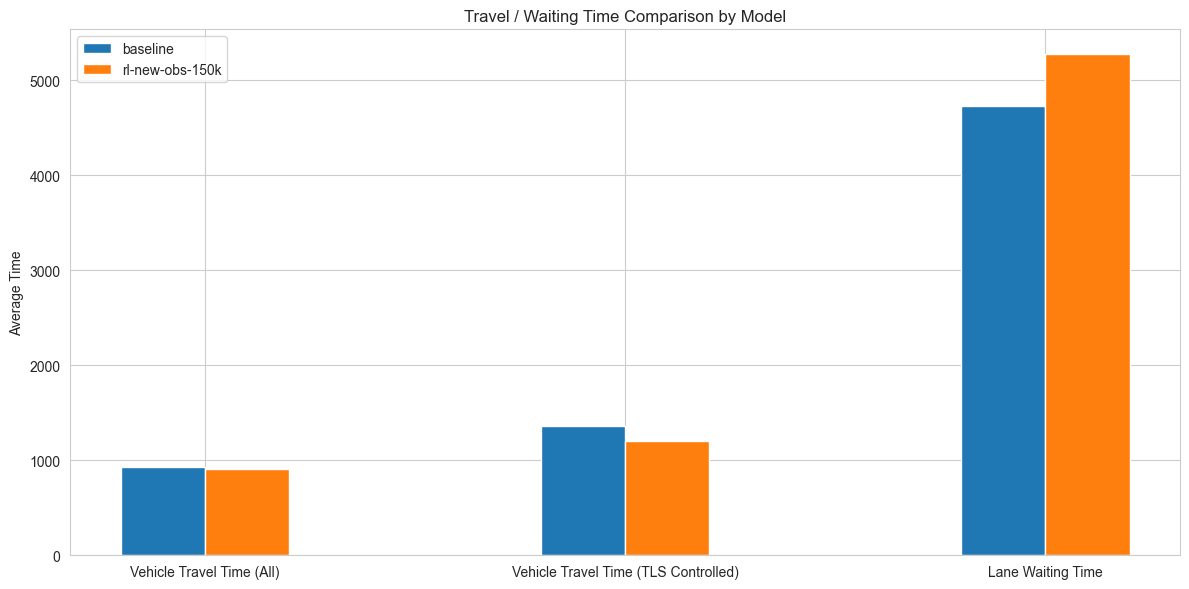

In [6]:
# Combine all dictionaries
all_data = {}
for model in vehicle_travel_time_all.keys():
    all_data[model] = {
        'Vehicle Travel Time (All)': vehicle_travel_time_all[model],
        'Vehicle Travel Time (TLS Controlled)': vehicle_travel_time_tls_controlled[model],
        'Lane Waiting Time': lane_waiting_time[model]
    }

# Plotting
plt.figure(figsize=(12, 6))
bar_width = 0.2
for i, (model, data_dict) in enumerate(all_data.items()):
    model_averages = {label: np.mean(times) for label, times in data_dict.items()}
    x_values = np.arange(len(model_averages)) + i * bar_width
    plt.bar(x_values, list(model_averages.values()), width=bar_width, label=model)

plt.ylabel('Average Time')
plt.title('Travel / Waiting Time Comparison by Model')

# Customize x-axis tick labels
plt.xticks(np.arange(len(list(all_data.values())[0])) + 0.5 * bar_width, list(model_averages.keys()))

# Show the plot
plt.legend()
plt.tight_layout()
plt.show()

In [8]:
df1 = pd.read_csv("C:/Users/KarstenK/Desktop/results/half-vehicles/rl-new-obs-150k/training_progress.csv")
# df2 = pd.read_csv("C:/Users/KarstenK/Desktop/results/rl-new-obs/training_progress.csv")
# df3 = pd.read_csv("C:/Users/KarstenK/Desktop/results/rl-new-obs-500k/training_progress.csv")

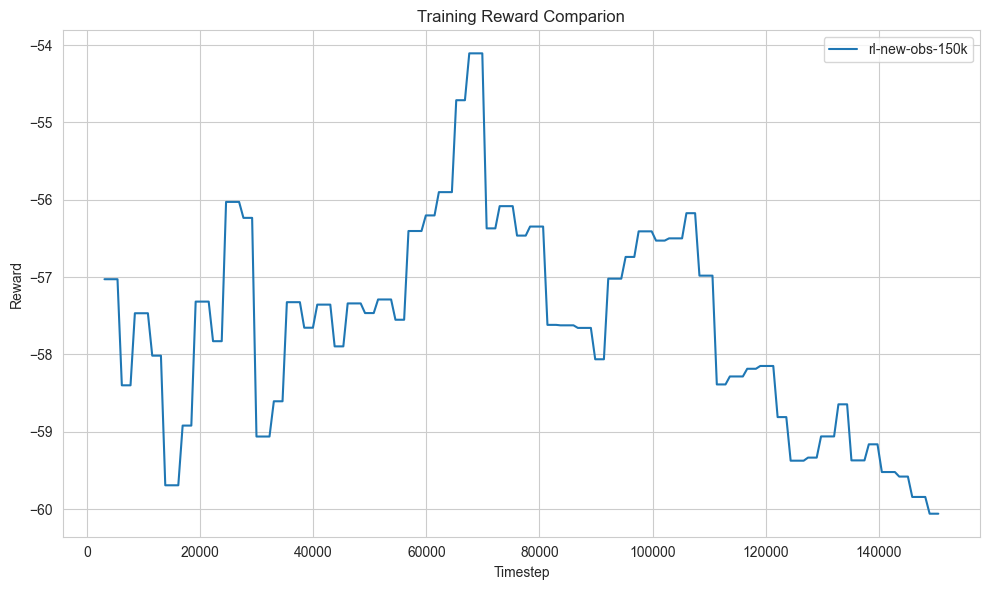

In [11]:
series1_x = df1["time/total_timesteps"]
series1_y = df1.iloc[:, -2]

# series2_x = df2["time/total_timesteps"]
# series2_y = df2.iloc[:, -1]
#
# series3_x = df3["time/total_timesteps"]
# series3_y = df3.iloc[:, -2]

# Plotting
plt.figure(figsize=(10, 6))
sns.lineplot(x=series1_x, y=series1_y, label="rl-new-obs-150k")
# sns.lineplot(x=series2_x, y=series2_y, label="rl-new-obs")
# sns.lineplot(x=series3_x, y=series3_y, label="rl-new-obs-500k")

# Add labels and title
plt.xlabel('Timestep')
plt.ylabel('Reward')
plt.title('Training Reward Comparion')

# Show the plot
plt.legend()
plt.tight_layout()
plt.show()
